# LLAVA

In this notebook we will use [LLAVA](https://llava-vl.github.io/), a vision language model, to inspect a natural image.

In [1]:
import openai
from skimage.io import imread
import stackview
from image_utilities import numpy_to_bytestream
import base64
from stackview._image_widget import _img_to_rgb

## Example images
First we load a natural image

The LLava model is capable of describing images via the [ollama](https://ollama.com/) API.

In [2]:
def prompt_ollama(prompt:str, image, model="llava"):
    """A prompt helper function that sends a message to ollama
    and returns only the text response.
    """
    rgb_image = _img_to_rgb(image)
    byte_stream = numpy_to_bytestream(rgb_image)
    base64_image = base64.b64encode(byte_stream).decode('utf-8')

    message = [{
        'role': 'user',
        'content': prompt,
        'images': [base64_image]
    }]
        
    # setup connection to the LLM
    client = openai.OpenAI(
        base_url = "http://localhost:11434/v1"
    )
    
    # submit prompt
    response = client.chat.completions.create(
        model=model,
        messages=message
    )
    
    # extract answer
    return response.choices[0].message.content

StackViewNDArray([[[176, 178, 179],
                   [175, 178, 178],
                   [177, 177, 180],
                   ...,
                   [182, 186, 188],
                   [185, 188, 191],
                   [191, 194, 197]],

                  [[178, 180, 181],
                   [178, 179, 181],
                   [178, 180, 181],
                   ...,
                   [185, 189, 192],
                   [187, 191, 192],
                   [191, 195, 198]],

                  [[181, 183, 185],
                   [180, 182, 183],
                   [180, 181, 183],
                   ...,
                   [190, 193, 196],
                   [189, 193, 196],
                   [192, 195, 198]],

                  ...,

                  [[125,  91,  66],
                   [124,  90,  65],
                   [123,  89,  65],
                   ...,
                   [137,  92,  64],
                   [136,  91,  62],
                   [135,  89,  61]],

                  [[122,  88,  64],
                   [121,  87,  63],
                   [121,  87,  63],
                   ...,
                   [142,  96,  68],
                   [142,  96,  68],
                   [139,  94,  65]],

                  [[120,  86,  62],
                   [120,  86,  60],
                   [119,  85,  61],
                   ...,
                   [144,  99,  70],
                   [144,  99,  70],
                   [142,  97,  68]]], dtype=uint8)
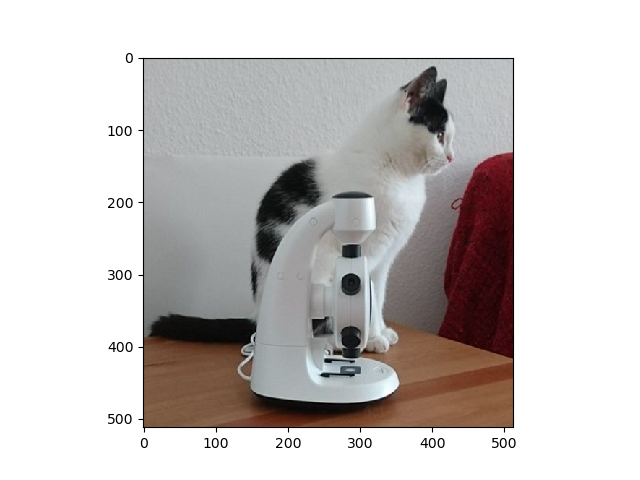
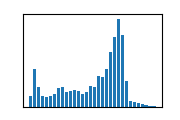

In [3]:
image = imread("data/real_cat.png")
stackview.insight(image)

In [4]:
prompt_ollama("what's in this image?", image, model="llava")

' The image is not provided. Please provide an image, and I can give you information about it. '

## Exercise
Load the MRI dataset and ask LLava about the image.